In [9]:
import albumentations as A
import numpy as np
import torch
from PIL import Image
from pathlib import Path
from src.segmentation.dataset import BubDataset
from src.utils.config import get_config_from_path
from src.segmentation.model import setup_segmentation_model
from albumentations.pytorch import ToTensorV2
config = get_config_from_path('./configs/seg_unet_ef1.py')


In [2]:
dataset = BubDataset(config)

In [3]:
def decode(ten_in: torch.Tensor):
    return ((ten_in.permute(1, 2, 0).numpy() + 1) * 127.5).astype(np.uint8)[..., 0]

def decode_mask(ten_in: torch.Tensor):
    return (ten_in.permute(1, 2, 0).numpy() * 255).astype(np.uint8)[..., 0]

In [4]:
model = setup_segmentation_model(config, True)

In [7]:
# img, gt = dataset.__getitem__(1)
# dec_img = decode(img)
# dec_mask = decode_mask(gt)

In [11]:
roor_dir = Path('/mnt/c/Users/egorn/Desktop/WDP/segment_fs/iterative/v1/to_process/') # Users\egorn\Desktop\WDP\dataset\train\original

In [12]:
path_list = list(roor_dir.glob('*.png'))

In [13]:
def process_pic(path):
    img = np.asarray(Image.open(path).convert('L'))
    tensor_pic = ToTensorV2()(image=img)['image'] / 127.5 - 1
    res = model.predict(tensor_pic.unsqueeze(0).cuda()).cpu().squeeze(0)
    return decode_mask(res)

In [14]:
path_list[0]

PosixPath('/mnt/c/Users/egorn/Desktop/WDP/segment_fs/iterative/v1/to_process/4.7_frame_28.png')

In [19]:
imgs = []
for pic_i in path_list:
    img = Image.fromarray((process_pic(pic_i) > 245).astype(np.uint8) * 255)
    imgs.append(img)
    # img.save(f'/mnt/c/Users/egorn/Desktop/WDP/segment_fs/iterative/v1/to_process/{pic_i.stem}_mask.png')

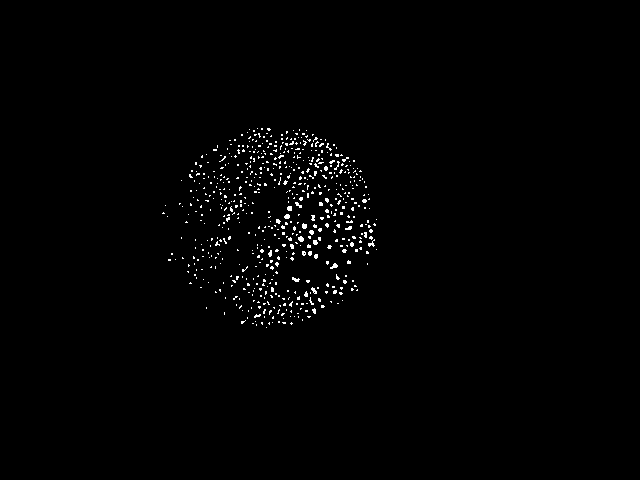

In [20]:
imgs[0]